In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# CROSS-VALIDATION

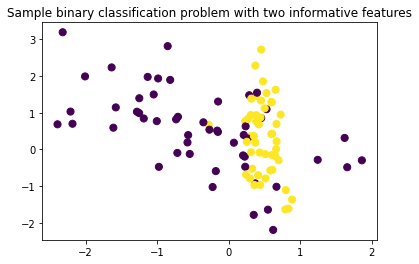

In [2]:
from sklearn.datasets import make_classification
plt.figure()
plt.title('Sample binary classification problem with two informative features')
# this creates 2, bidimensional NP arrays
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50);

In [3]:
from sklearn.model_selection import cross_val_score

# testing cross-val with a KNN
from sklearn.neighbors import KNeighborsClassifier

# instantiating the classifier
clf = KNeighborsClassifier(n_neighbors=5)

# this is the actual scorer
    # it takes the model, the features and the expected value as parameters
    # then, it returns a list of scores.
    # we can also specify the number of folds and validations to perform via the CV argument
    # n_jobs uses a python library for parallelism and multiple processor usage
scores = cross_val_score(clf, X_C2, y_C2, cv=7, n_jobs=-1)
scores

array([0.8       , 0.73333333, 0.64285714, 0.78571429, 0.92857143,
       0.85714286, 0.57142857])

## Validation Curves

In [4]:
from sklearn.svm import SVC

from sklearn.model_selection import validation_curve

param_score = np.logspace(-5,5,4)

train_scores, test_scores = validation_curve(SVC(), X_C2, y_C2, param_name="gamma", param_range=param_score)
print(train_scores)
print(test_scores)

[[0.5125 0.5125 0.525  0.525  0.525 ]
 [0.75   0.7125 0.7125 0.725  0.75  ]
 [0.975  0.975  0.9625 0.9625 0.95  ]
 [1.     1.     1.     1.     1.    ]]
[[0.55 0.55 0.5  0.5  0.5 ]
 [0.65 0.75 0.8  0.75 0.7 ]
 [0.75 0.75 0.6  0.8  0.6 ]
 [0.55 0.55 0.5  0.5  0.5 ]]


# DECISION TREES

In [20]:
# importing relevant dataset
from sklearn.datasets import load_iris
# importing the corresponding module
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 3)
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.95


In [21]:
# we can set the decision trees max_depth to prevent or limit overfitting of training data.
clf = DecisionTreeClassifier(max_depth=3)
clf. fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.98
Accuracy of Decision Tree classifier on test set: 0.97


In [22]:
# we can also retrieve the feature impportance (which is a normalized weight, from 0 to 1, of the relevant features)
print(clf.feature_importances_)

[0.         0.         0.56801409 0.43198591]


<BarContainer object of 4 artists>

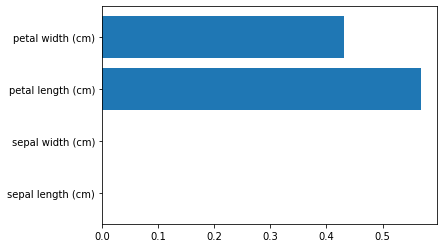

In [23]:
plt.barh(iris.feature_names, clf.feature_importances_)